# NOTA: Los datos fueron genrados de manera aleatoria en la herramienta https://www.mockaroo.com/, me parece que es muy util para cuando queremos simular data, la adjunto para compartir. 

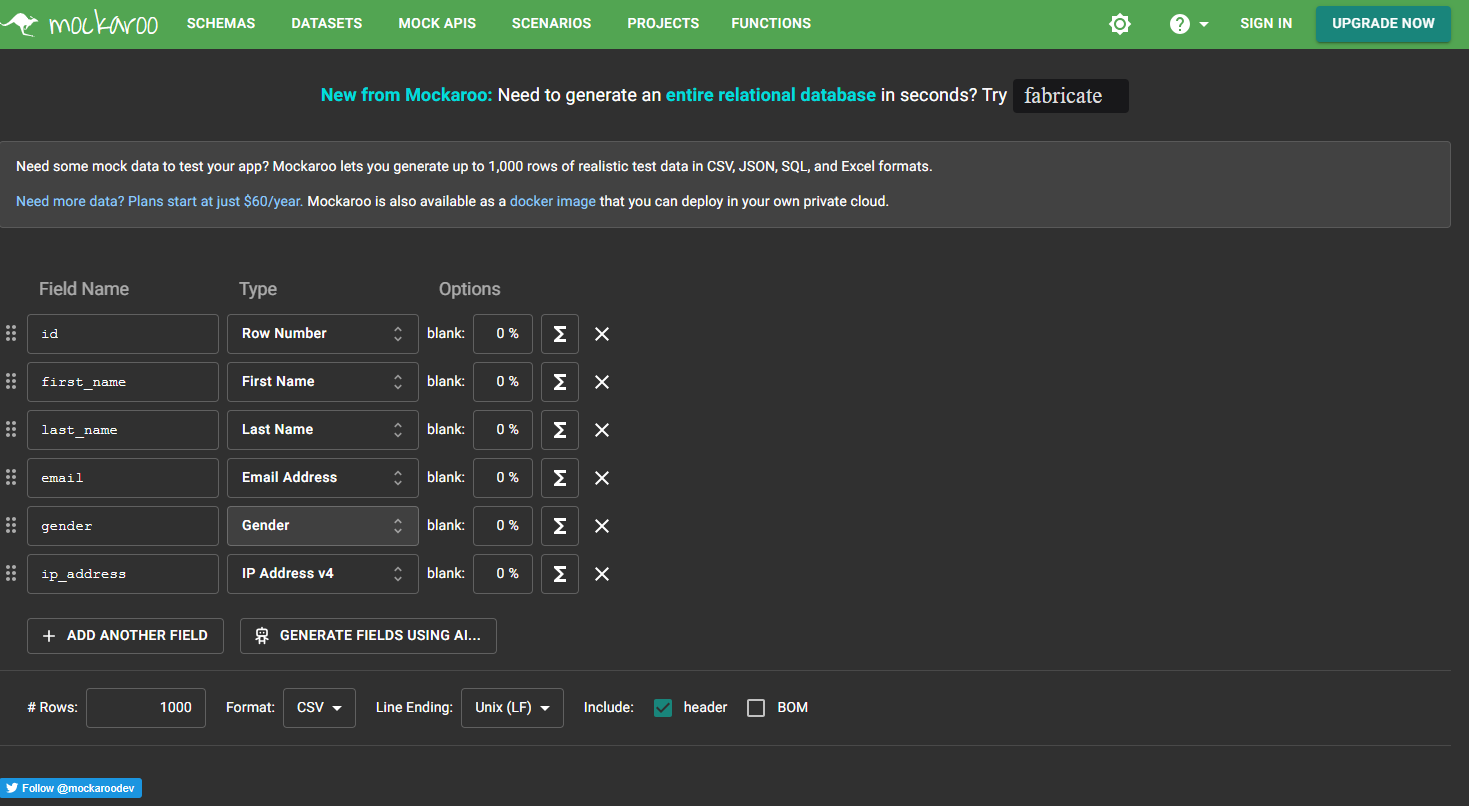

=== Fold 1 ===
Precisión: 1.00
Precisión (para deuda > 100): 1.00
Recall (para deuda > 100): 1.00
F1-score (para deuda > 100): 1.00

=== Fold 2 ===
Precisión: 1.00
Precisión (para deuda > 100): 1.00
Recall (para deuda > 100): 1.00
F1-score (para deuda > 100): 1.00

=== Fold 3 ===
Precisión: 1.00
Precisión (para deuda > 100): 1.00
Recall (para deuda > 100): 1.00
F1-score (para deuda > 100): 1.00

=== Fold 4 ===
Precisión: 1.00
Precisión (para deuda > 100): 1.00
Recall (para deuda > 100): 1.00
F1-score (para deuda > 100): 1.00

=== Fold 5 ===
Precisión: 1.00
Precisión (para deuda > 100): 1.00
Recall (para deuda > 100): 1.00
F1-score (para deuda > 100): 1.00

=== Métricas promediadas ===
Precisión promedio: 1.00
Precisión promedio (para deuda > 100): 1.00
Recall promedio (para deuda > 100): 1.00
F1-score promedio (para deuda > 100): 1.00


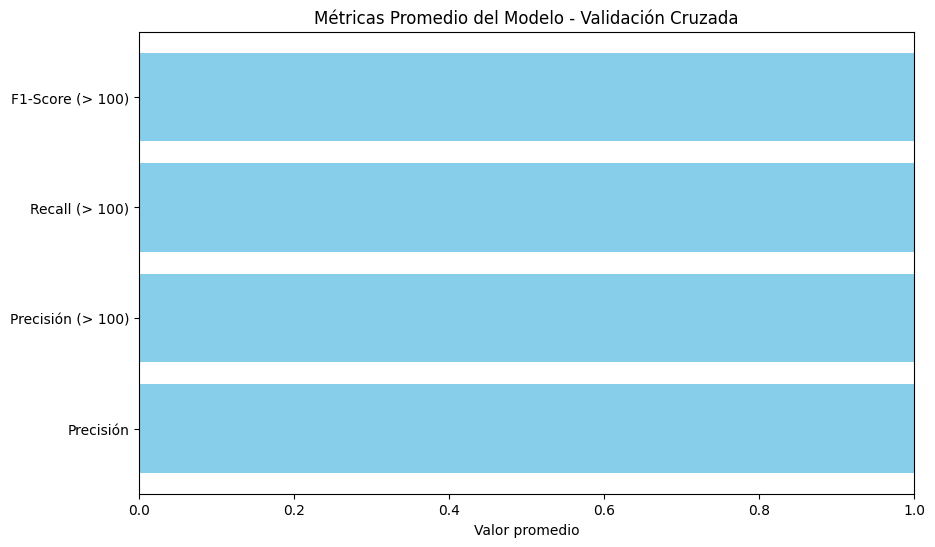

In [2]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Cargar los datos desde un archivo Excel
df = pd.read_excel('datos - Variantes.xlsx')

# Definir características (X) y la variable objetivo (y)
X = df[['Ingresos', 'Edad', 'Historia_credito']]
y = np.where(df['Deuda'] > 100, 1, 0)  # Clasificación: 1 si deuda > 100, 0 si deuda <= 100

# Inicializar KFold con 5 divisiones
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(random_state=42)

# Inicializar listas para almacenar las métricas promediadas
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Validación cruzada
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Predecir
    predictions = model.predict(X_test)
    
    # Calcular y almacenar métricas
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)
    
    precision = precision_score(y_test, predictions)
    precisions.append(precision)
    
    recall = recall_score(y_test, predictions)
    recalls.append(recall)
    
    f1 = f1_score(y_test, predictions)
    f1_scores.append(f1)
    
    # Imprimir el informe de clasificación para cada fold
    print(f"=== Fold {fold} ===")
    print(f"Precisión: {accuracy:.2f}")
    print(f"Precisión (para deuda > 100): {precision:.2f}")
    print(f"Recall (para deuda > 100): {recall:.2f}")
    print(f"F1-score (para deuda > 100): {f1:.2f}\n")

# Imprimir las métricas promediadas después de todos los folds
print("=== Métricas promediadas ===")
print(f'Precisión promedio: {np.mean(accuracies):.2f}')
print(f'Precisión promedio (para deuda > 100): {np.mean(precisions):.2f}')
print(f'Recall promedio (para deuda > 100): {np.mean(recalls):.2f}')
print(f'F1-score promedio (para deuda > 100): {np.mean(f1_scores):.2f}')

# Graficar las métricas promedio
plt.figure(figsize=(10, 6))
metrics = ['Precisión', 'Precisión (> 100)', 'Recall (> 100)', 'F1-Score (> 100)']
values = [np.mean(accuracies), np.mean(precisions), np.mean(recalls), np.mean(f1_scores)]

plt.barh(metrics, values, color='skyblue')
plt.xlim(0, 1)
plt.xlabel('Valor promedio')
plt.title('Métricas Promedio del Modelo - Validación Cruzada')
plt.show()


# Conclusiones

## Quise que los datos de mi modelo tuvieran un comportamiento no tan complejo para entender de mejor manera los conceptos, quedo impresionado con las capacidades de un modelo ML para poder clasificar los datos, puede que no tenga una complejidad muy elevada pero realmente me quedo con el detalle de entender como evaluar el rendimiento, genera una gran confianza en los resultados, al ver los datos tan en cumplimiento pensé en cambiar el dataset, pero creo importante validar un caso que cumpla al 100%, dicho esto dejo los comentarios que creo que caracterizan a mi modelo. 
### El modelo se adapta demasiado a los datos de entrenamiento y puede no funcionar bien con datos nuevos (SOBREAJUSTE).
### Los datos de entrada son simples para las capacidades del modelo.
### Existe una correlación muy fuerte entre las características (Ingresos, Edad, Historia de crédito) y la variable objetivo (Deuda), lo que podría explicar los resultados tan precisos.
